In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

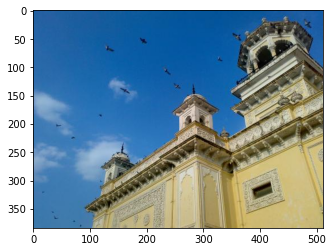

(384, 512, 3)


In [19]:
imgf=cv2.imread('images/home.jpg')
img=cv2.cvtColor(imgf,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()
print(img.shape)

[array([ 50, 116, 178], dtype=uint8), array([ 10,  88, 158], dtype=uint8), array([150, 141, 105], dtype=uint8)]


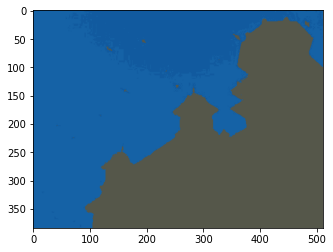

[array([ 58, 120, 180], dtype=uint8), array([ 19,  84, 141], dtype=uint8), array([162, 153, 115], dtype=uint8)]


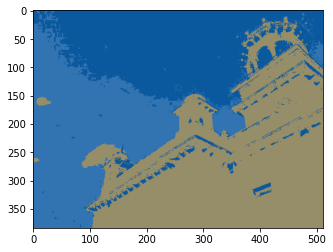

[array([ 58, 121, 181], dtype=uint8), array([ 27,  82, 130], dtype=uint8), array([172, 162, 123], dtype=uint8)]


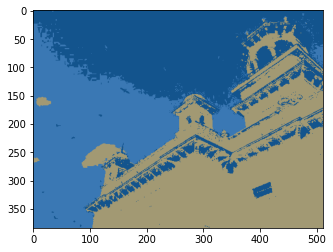

[array([ 54, 118, 179], dtype=uint8), array([ 33,  82, 120], dtype=uint8), array([177, 167, 128], dtype=uint8)]


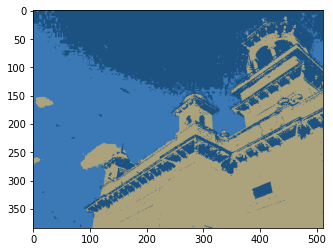

[array([ 46, 113, 176], dtype=uint8), array([ 42,  79, 104], dtype=uint8), array([179, 170, 131], dtype=uint8)]


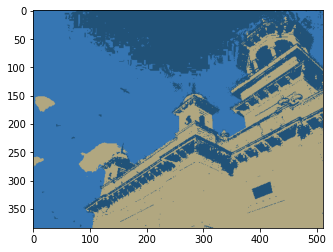

[array([ 36, 106, 172], dtype=uint8), array([75, 72, 53], dtype=uint8), array([180, 172, 134], dtype=uint8)]


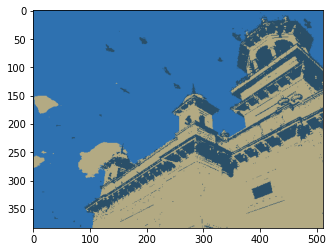

[array([ 35, 105, 171], dtype=uint8), array([81, 76, 52], dtype=uint8), array([181, 173, 137], dtype=uint8)]


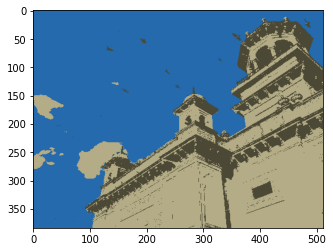

[array([ 35, 105, 171], dtype=uint8), array([83, 77, 53], dtype=uint8), array([181, 174, 138], dtype=uint8)]


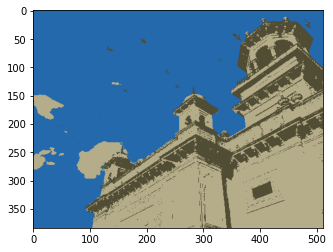

[array([ 35, 105, 171], dtype=uint8), array([84, 77, 53], dtype=uint8), array([182, 174, 139], dtype=uint8)]


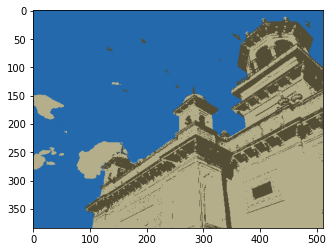

In [21]:
k=3
colors=[]
for i in range(k):
  colors.append(img[random.randint(0,img.shape[0]),random.randint(0,img.shape[1])])
delta=1
segimg=np.zeros_like(img)
segtmp=segimg+2
err=np.abs(segimg-segtmp)
labelimg=np.zeros((img.shape[0],img.shape[1]),np.uint8)
while np.average(err)>delta:
    segtmp=segimg+0
    label=np.arange(0,k,1)
    
    dist=[i+1 for i in range(k)]
    imgt=np.float128(img)
    for i in label:
        dist[i]=imgt-np.ones_like(imgt)*colors[i]

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum=[]
            for x in range(k):
                sum.append(0)
                for clr in range(3):
                    sum[x]+=dist[x][i,j,clr]**2
            labelimg[i,j]=sum.index(min(sum))
            segimg[i,j]=colors[labelimg[i,j]]
    for y in range(k):
        cnt=r=g=b=0
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if labelimg[i,j]==y:
                    cnt+=1
                    r+=img[i,j,0]
                    g+=img[i,j,1]
                    b+=img[i,j,2]
        if cnt==0:
          cnt=1
        colors[y][0]=r//cnt
        colors[y][1]=g//cnt
        colors[y][2]=b//cnt
    
    err=np.abs(segimg-segtmp)
    print(colors)
    plt.imshow(segimg)
    plt.show()
    
        

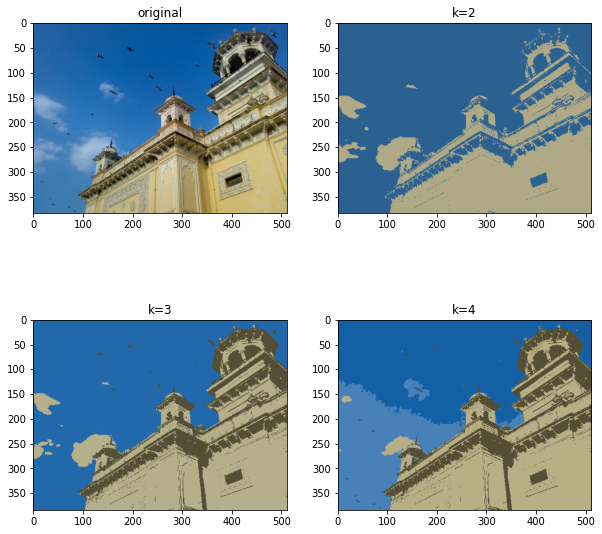

In [26]:
def kmeans(img,k):
  colors=[]
  for i in range(k):
    colors.append(img[random.randint(0,img.shape[0]-1),random.randint(0,img.shape[1])-1])
  delta=1
  segimg=np.zeros_like(img)
  segtmp=segimg+2
  err=np.abs(segimg-segtmp)
  labelimg=np.zeros((img.shape[0],img.shape[1]),np.uint8)
  while np.average(err)>delta:
      segtmp=segimg+0
      label=np.arange(0,k,1)
      
      dist=[i+1 for i in range(k)]
      imgt=np.float128(img)
      for i in label:
          dist[i]=imgt-np.ones_like(imgt)*colors[i]

      for i in range(img.shape[0]):
          for j in range(img.shape[1]):
              sum=[]
              for x in range(k):
                  sum.append(0)
                  for clr in range(3):
                      sum[x]+=dist[x][i,j,clr]**2
              labelimg[i,j]=sum.index(min(sum))
              segimg[i,j]=colors[labelimg[i,j]]
      for y in range(k):
          cnt=r=g=b=0
          for i in range(img.shape[0]):
              for j in range(img.shape[1]):
                  if labelimg[i,j]==y:
                      cnt+=1
                      r+=img[i,j,0]
                      g+=img[i,j,1]
                      b+=img[i,j,2]
          if cnt==0:
            cnt=1
          colors[y][0]=r//cnt
          colors[y][1]=g//cnt
          colors[y][2]=b//cnt
      
      err=np.abs(segimg-segtmp)
  return segimg
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('original')

plt.subplot(2,2,2)
plt.imshow(kmeans(img,2))
plt.title('k=2')

plt.subplot(2,2,3)
plt.imshow(kmeans(img,3))
plt.title('k=3')

plt.subplot(2,2,4)
plt.imshow(kmeans(img,4))
plt.title('k=4')

plt.show()
        